In [ ]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations, DifferentialEquations
gr();

# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\dx{\D x}
\def\dt{\D t}
\def\C{{\mathbb C}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqfor{\qquad\hbox{for}\qquad}
$$

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes

# Lecture 13: Electric charges in a potential well

1. One charge in a well
2. Two charges in a well
3. $N$ charges in a well
4. Limiting distribution


We study the dynamics of many electric charges in a potential well.  We restrict our attention to 1D: picture an infinitely long wire with carges on it. We will see that as the number of charges becomes large, we can determine the limiting distribution using an additive Riemann–Hilbert problem, but one which the _interval_ its posed on is solved for.

## One charge in a potential well 

Consider a point charge in a well $V(x) = x^2 / 2$, initially located at $\lambda^0$. The dynamics of the point charge are governed by
$$
{ \D \lambda \over \dt} = -V'(\lambda) = -  \lambda
$$
that is: if we are positive we move left and if we are negative we move right. Here is a movie:

In [ ]:
V = x -> x^2/2
Vp = x -> x

λ⁰ = 2.3  # initial location
prob = ODEProblem((λ,_,t) -> -Vp(λ), λ⁰, (0.0, 10.0))
λ = solve(prob; reltol=1E-6);

In [ ]:
@gif for t=0.0:0.05:7.0
    plot(V, range(-5, stop=5, length=100); label="potential", title="t = $t")
    scatter!([λ(t)] ,[0.0]; label="charge")
end

![One charge](onecharge.gif)

In the limit the charge reaches an equilibrium: it no longer varies in time. I.e., it reaches a point where ${\D\lambda \over \dt} = 0$, which is equivalent to solving
$$
 0 = - V'(\lambda)  = - \lambda
$$
in other words, the minimum of the well, in this case $\lambda = 0$.

### Two charges in a potential well 

Suppose there are now two charges, $\lambda_1$ and $\lambda_2$.  The effect on the first charge $\lambda_1$ is to repulse away from $\lambda_2$ via via:
$$
{\D \lambda_1 \over \D t} = {1 \over \lambda_1 -\lambda_2}
$$
Similarly, the effect on $\lambda_2$ is
$$
{\D \lambda_2 \over \D t} = {1 \over \lambda_2 -\lambda_1}
$$
Unrestricted, the two potentials will repulse off to infinity:

In [11]:
λ⁰ = [1.2,2.3]  # initial location
prob = ODEProblem((λ,_,t) -> [1/(λ[1] - λ[2]), 1/(λ[2] - λ[1])], λ⁰, (0.0, 10.0))
λ = solve(prob; reltol=1E-6);

In [ ]:
@gif for t=0.0:0.05:7.0
    scatter(λ(t) ,zeros(2); label="charges", xlims=(-5,5), title="t = $t")
end

![Two charges, no potential](twocharges_nov.gif)

Adding in a potential well and we get an equilbrium again:
\begin{align*}
{\D \lambda_1 \over \D t} = {1 \over \lambda_1 -\lambda_2} - V'(\lambda_1) \\
{\D \lambda_2 \over \D t} = {1 \over \lambda_2 -\lambda_1} - V'(\lambda_2)
\end{align*}


In [12]:
λ₀ = [1.2,2.3]  # initial location
prob = ODEProblem((λ,_,t) -> [1/(λ[1] - λ[2]) - Vp(λ[1]), 1/(λ[2] - λ[1]) - Vp(λ[2])], λ₀, (0.0, 10.0))
λ = solve(prob; reltol=1E-6);

In [ ]:
@gif for t=0.0:0.05:7.0
    plot(V, range(-5, stop=5, length=100); label="potential", title="t = $t")
    scatter!(λ(t) ,zeros(2); label="charges", xlims=(-5,5), title="t = $t")
end

![Two charges](twocharges.gif)

The limiting distribution is given by
\begin{align*}
0 = {1 \over \lambda_1 -\lambda_2} - V'(\lambda_1) \\
0 = {1 \over \lambda_2 -\lambda_1} - V'(\lambda_2) 
\end{align*}
For this potential, we can solve it exactly: we need to solve
\begin{align*}
\lambda_1 = {1 \over \lambda_1 -\lambda_2}  \\
\lambda_2 = {1 \over \lambda_2 -\lambda_1} 
\end{align*}
Using $\lambda_1 = -\lambda_2$, we find that $\lambda_1 = \pm{1 \over \sqrt 2}$.

### $N$ charges in a potential well

Each charge repulses every other charge, so we end up needing to sum over them all:
\begin{align*}
{\D \lambda_k \over \D t} = \sum_{j=1 \atop j \neq k}^N {1 \over \lambda_k -\lambda_j} - V'(\lambda_k) \\
\end{align*}



In [14]:
N = 100
λ⁰ = randn(N)  # initial location
prob = ODEProblem((λ,_,t) -> [sum(1 ./ (λ[k] .- λ[[1:k-1;k+1:end]])) - Vp(λ[k]) for k=1:N], λ⁰, (0.0, 10.0))
λ = solve(prob; reltol=1E-6);

In [ ]:
@gif for t=0.0:0.05:7.0
    plot(V, range(-5, stop=5, length=100); label="potential", title="t = $t")
    scatter!(λ(t) ,zeros(N); label="charges", xlims=(-5,5), title="t = $t")
end

![N charges](ncharges.gif)

As the number of charges becomes large, they spread off to infinity. In the case of $V(x) = x^2$, we can renormalize by  dividing by $N$ so they stay bounded:
$\mu_k = {\lambda_k \over \sqrt N}$

In [ ]:
@gif for t=0.0:0.05:7.0
    scatter(λ(t)/sqrt(N) ,zeros(N); label="charges", xlims=(-2,2), title="t = $t")
end

![N charges, rescaled](ncharges_scaled.gif)

This begs questions: why does it balance out at $\pm \sqrt 2$? Why does it have a nice histogram precisely like ${\sqrt{2-x^2} \over \pi}$:

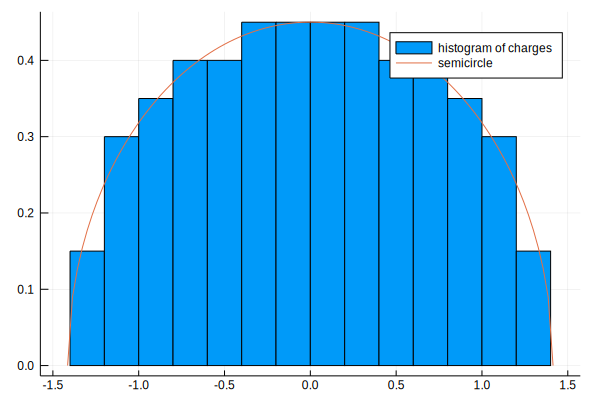

In [15]:
histogram(λ(10.0)/sqrt(N); nbins=20, normalize=true, label="histogram of charges")
plot!(x -> sqrt(2-x^2)/(π), range(eps()-sqrt(2.0); stop=sqrt(2)-eps(), length=100), label="semicircle")

### Equilibrium distribution

Plugging in $\lambda_k = \sqrt N \mu_k$, we get a dynamical system for $\mu_k$:
$$
 {\D  \mu_k \over \D t} = {1 \over N} \sum_{j=1 \atop j \neq k}^N {1 \over \mu_k -\mu_j} -  \mu_k
$$
(The choice of scaling like $\sqrt N$ was dictated by $V'(x)$, if $V(x) = x^4$ it would be $N^{1/4}$.) Thus the limit of the charges is given by
$$
0 = {1 \over N} \sum_{j=1 \atop j \neq k}^N {1 \over \mu_k -\mu_j} -  \mu_k 
$$



It is convenient to represent the point charges by Dirac delta functions:
$$
    w_N(x) = {1 \over N} \sum_{k=1}^N \delta_{\mu_k}(x)
$$
normalized so that $\int w_N(x) \dx = 1$, so that
$$
    {1 \over N} \sum_{k=1}^N {1 \over  x -\mu_j} = \int_{-\infty}^\infty {w_N(t) \dt \over x - t}
$$
or in other words, we have 
$$
 \HH_{(-\infty,\infty)} w_N(\mu_k) = -{V'(\mu_k) \over \pi}
$$
since
$$
\HH w_n (\mu_k) = {1 \over \pi} \lim_{\epsilon\rightarrow 0} \left(\int_{-\infty}^{\mu_k-\epsilon} + \int_{\mu_k+\epsilon}^\infty\right) {w_N(t)  \over t - \mu_k} \dt  = {1 \over N\pi} \sum_{j \neq k} {1 \over \mu_j - \mu_k}
$$

Formally (see a more detailed explanation below), $w_N(x)$ tends to a continuous limit as $N\rightarrow \infty$, which we have guessed from the histogram to be $w(x) = { \sqrt{2-x^2}  \over \pi}$ for $-\sqrt 2 < x < \sqrt2$.  We expect this limit to satisfy the same equation as $w_n$, that is
$$
 \HH w(x) = -{x \over \pi}
$$
for $x$ in the support of $w(x)$.


Indeed:
    

In [16]:
x = Fun(-sqrt(2) .. sqrt(2))
w = sqrt(2-x^2)/π

norm(hilbert(w) + x/π)

UndefVarError: UndefVarError: norm not defined

Why is it $[-\sqrt 2, \sqrt 2]$? 

We thus want to choose the interval $[a,b]$ so that there exists a $w(x)$  satisfying

1. $w$ is bounded (Based on observation)
2. $w(x) \geq 0$ for $a \leq x \leq b$ (Since it is a probability distribution)
2. $\int_a^b w(x) \dx = 1$ (Since it is a probability distribution)
3. $\HH_{[a,b]} w(x) = - x/\pi$ 

As we saw last lecture, there exists a bounded solution to 
$\HH_{[-b,b]} u =  - x/\pi$,
namely  $u(x) = { \sqrt{b^2-x^2} \over \pi}$. The choice $b = \sqrt{2}$ ensures that $\int_{-b}^b u(x) \dx = 1$, hence $u(x) = w(x)$.

### Aside: Explanation of limit of $w_N(x)$

This is beyond the scope of the course, but the convergence of $w_N(x)$ to $w(x)$ is known as weak-\* convergence. A simple version of this is that
$$
   \int_c^d w_N(x) \dx \rightarrow \int_c^d w(x) \dx
$$
for every choice of interval $(c,d)$. $   \int_c^d w_N(x) \dx $ is precisely the number of charges in $(c,d)$ scaled by $1/N$,  which is exactly what a histogram plots.

In [17]:
a = -0.1; b= 0.3;
w = Fun(x -> sqrt(2-x^2)/π, a .. b)
sum(w)  # integral of w(x) between a and b

0.1790059168895313

In [18]:
length(filter(λ -> a ≤ λ ≤ b, λ(10.0)/sqrt(N)))/N # integral of w_N(x) between a and b 

0.18

Another varient of describing weak-\* convergence is that the Cauchy transforms converge, that is, for $z$ on any  contour $\gamma$ surrounding $a$ and $b$ (now the support of $w$) we have
$$
\int_a^b {w_N(x) \over x - z} \dx \rightarrow \int_a^b {w(x) \over x - z} \dx
$$
converges uniformly with respect to $N \rightarrow \infty$.
here we demonstrate it converges at a point:

In [19]:
x = Fun(-sqrt(2) .. sqrt(2))
w = sqrt(2-x^2)/π
z = 0.1+0.2im
cauchy(w, z)

0.1949409042727309 + 0.013681505291622225im

In [21]:
(sum(1 ./((λ(10.0)/sqrt(N)) .- z))/N)/(2π*im)

0.19542123392652283 + 0.013724448552242337im